In [125]:
import pandas as pd
import os
import requests
import time
import datetime

from geopy.distance import geodesic
import geopandas as gpd

import matplotlib.pyplot as plt


In [126]:
data_df = pd.read_csv("data2015bars_weather.csv", encoding="unicode_escape")

data_df

,Master Record Number,Date,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude,Location,Number of Bars,Weather Condition
0,902582972,2015-12-04,Weekday,2200,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,2ND & HIGH,39.160944,-86.508288,"39.160944,-86.508288",7,Clear
1,902484079,2015-07-06,Weekday,1300,2-Car,Incapacitating,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,S LEONARD SPRINGS,39.142048,-86.582592,"39.142048,-86.582592",1,Clear
2,902399070,2015-02-06,Weekday,1600,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,BARGE & S LEONARD SPRINGS,39.135797,-86.582496,"39.13579732,-86.582496",1,Clear
3,902403874,2015-02-06,Weekday,1300,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,GRAHAM & ROGERS,39.139920,-86.538416,"39.13992,-86.538416",2,Clear
4,902471166,2015-06-06,Weekday,500,1-Car,No injury/unknown,ANIMAL/OBJECT IN ROADWAY,SR37N & WYLIE,39.198571,-86.529524,"39.19857096,-86.5295245",0,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,902384628,2015-01-07,Weekend,1900,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,EAST RHORER & SOUTH WALNUT STREET,39.121440,-86.526496,"39.12144,-86.526496",0,Overcast
496,902405042,2015-03-01,Weekday,2200,3+ Cars,No injury/unknown,SPEED TOO FAST FOR WEATHER CONDITIONS,1ST & ROGERS,39.159504,-86.538592,"39.159504,-86.538592",41,Patchy moderate snow
497,902438510,2015-05-07,Weekend,1500,2-Car,No injury/unknown,IMPROPER TURNING,STATE ROAD 46,39.207648,-86.573792,"39.207648,-86.573792",0,Clear
498,902427112,2015-04-06,Weekday,1700,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,W THIRD,39.164752,-86.573104,"39.164752,-86.573104",5,Clear


In [127]:
data_df['Hour'] = data_df['Hour'].astype(str).str.zfill(4)

data_df

,Master Record Number,Date,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude,Location,Number of Bars,Weather Condition
0,902582972,2015-12-04,Weekday,2200,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,2ND & HIGH,39.160944,-86.508288,"39.160944,-86.508288",7,Clear
1,902484079,2015-07-06,Weekday,1300,2-Car,Incapacitating,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,S LEONARD SPRINGS,39.142048,-86.582592,"39.142048,-86.582592",1,Clear
2,902399070,2015-02-06,Weekday,1600,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,BARGE & S LEONARD SPRINGS,39.135797,-86.582496,"39.13579732,-86.582496",1,Clear
3,902403874,2015-02-06,Weekday,1300,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,GRAHAM & ROGERS,39.139920,-86.538416,"39.13992,-86.538416",2,Clear
4,902471166,2015-06-06,Weekday,0500,1-Car,No injury/unknown,ANIMAL/OBJECT IN ROADWAY,SR37N & WYLIE,39.198571,-86.529524,"39.19857096,-86.5295245",0,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,902384628,2015-01-07,Weekend,1900,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,EAST RHORER & SOUTH WALNUT STREET,39.121440,-86.526496,"39.12144,-86.526496",0,Overcast
496,902405042,2015-03-01,Weekday,2200,3+ Cars,No injury/unknown,SPEED TOO FAST FOR WEATHER CONDITIONS,1ST & ROGERS,39.159504,-86.538592,"39.159504,-86.538592",41,Patchy moderate snow
497,902438510,2015-05-07,Weekend,1500,2-Car,No injury/unknown,IMPROPER TURNING,STATE ROAD 46,39.207648,-86.573792,"39.207648,-86.573792",0,Clear
498,902427112,2015-04-06,Weekday,1700,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,W THIRD,39.164752,-86.573104,"39.164752,-86.573104",5,Clear


In [128]:

#data_df['Hour'] = data_df['Hour'].astype(int)
data_df['Hour'] = pd.to_datetime(data_df['Hour'], format='%H%M').dt.time


In [129]:
data_df

,Master Record Number,Date,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude,Location,Number of Bars,Weather Condition
0,902582972,2015-12-04,Weekday,22:00:00,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,2ND & HIGH,39.160944,-86.508288,"39.160944,-86.508288",7,Clear
1,902484079,2015-07-06,Weekday,13:00:00,2-Car,Incapacitating,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,S LEONARD SPRINGS,39.142048,-86.582592,"39.142048,-86.582592",1,Clear
2,902399070,2015-02-06,Weekday,16:00:00,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,BARGE & S LEONARD SPRINGS,39.135797,-86.582496,"39.13579732,-86.582496",1,Clear
3,902403874,2015-02-06,Weekday,13:00:00,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,GRAHAM & ROGERS,39.139920,-86.538416,"39.13992,-86.538416",2,Clear
4,902471166,2015-06-06,Weekday,05:00:00,1-Car,No injury/unknown,ANIMAL/OBJECT IN ROADWAY,SR37N & WYLIE,39.198571,-86.529524,"39.19857096,-86.5295245",0,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,902384628,2015-01-07,Weekend,19:00:00,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,EAST RHORER & SOUTH WALNUT STREET,39.121440,-86.526496,"39.12144,-86.526496",0,Overcast
496,902405042,2015-03-01,Weekday,22:00:00,3+ Cars,No injury/unknown,SPEED TOO FAST FOR WEATHER CONDITIONS,1ST & ROGERS,39.159504,-86.538592,"39.159504,-86.538592",41,Patchy moderate snow
497,902438510,2015-05-07,Weekend,15:00:00,2-Car,No injury/unknown,IMPROPER TURNING,STATE ROAD 46,39.207648,-86.573792,"39.207648,-86.573792",0,Clear
498,902427112,2015-04-06,Weekday,17:00:00,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,W THIRD,39.164752,-86.573104,"39.164752,-86.573104",5,Clear


In [130]:

def assign_severity(injury_type):
    if injury_type == 'No injury/unknown':
        return 1
    elif injury_type == 'Non-incapacitating':
        return 2
    elif injury_type == 'Incapacitating':
        return 2
    elif injury_type == 'Fatal':
        return 3
    else:
        return None

# Create a new column called Severity
data_df['Severity'] = data_df['Injury Type'].apply(assign_severity)
data_df

,Master Record Number,Date,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude,Location,Number of Bars,Weather Condition,Severity
0,902582972,2015-12-04,Weekday,22:00:00,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,2ND & HIGH,39.160944,-86.508288,"39.160944,-86.508288",7,Clear,1
1,902484079,2015-07-06,Weekday,13:00:00,2-Car,Incapacitating,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,S LEONARD SPRINGS,39.142048,-86.582592,"39.142048,-86.582592",1,Clear,2
2,902399070,2015-02-06,Weekday,16:00:00,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,BARGE & S LEONARD SPRINGS,39.135797,-86.582496,"39.13579732,-86.582496",1,Clear,1
3,902403874,2015-02-06,Weekday,13:00:00,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,GRAHAM & ROGERS,39.139920,-86.538416,"39.13992,-86.538416",2,Clear,1
4,902471166,2015-06-06,Weekday,05:00:00,1-Car,No injury/unknown,ANIMAL/OBJECT IN ROADWAY,SR37N & WYLIE,39.198571,-86.529524,"39.19857096,-86.5295245",0,Clear,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,902384628,2015-01-07,Weekend,19:00:00,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,EAST RHORER & SOUTH WALNUT STREET,39.121440,-86.526496,"39.12144,-86.526496",0,Overcast,1
496,902405042,2015-03-01,Weekday,22:00:00,3+ Cars,No injury/unknown,SPEED TOO FAST FOR WEATHER CONDITIONS,1ST & ROGERS,39.159504,-86.538592,"39.159504,-86.538592",41,Patchy moderate snow,1
497,902438510,2015-05-07,Weekend,15:00:00,2-Car,No injury/unknown,IMPROPER TURNING,STATE ROAD 46,39.207648,-86.573792,"39.207648,-86.573792",0,Clear,1
498,902427112,2015-04-06,Weekday,17:00:00,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,W THIRD,39.164752,-86.573104,"39.164752,-86.573104",5,Clear,1


# Ask: 
- Location - Long amd Lang - HAS same number of bars . SO, to analyse how correlation bettwen numbers of bars and accident i have to fisrt set up radius (5 km) with log/lang in thar area, total amount of accidents and level of severity
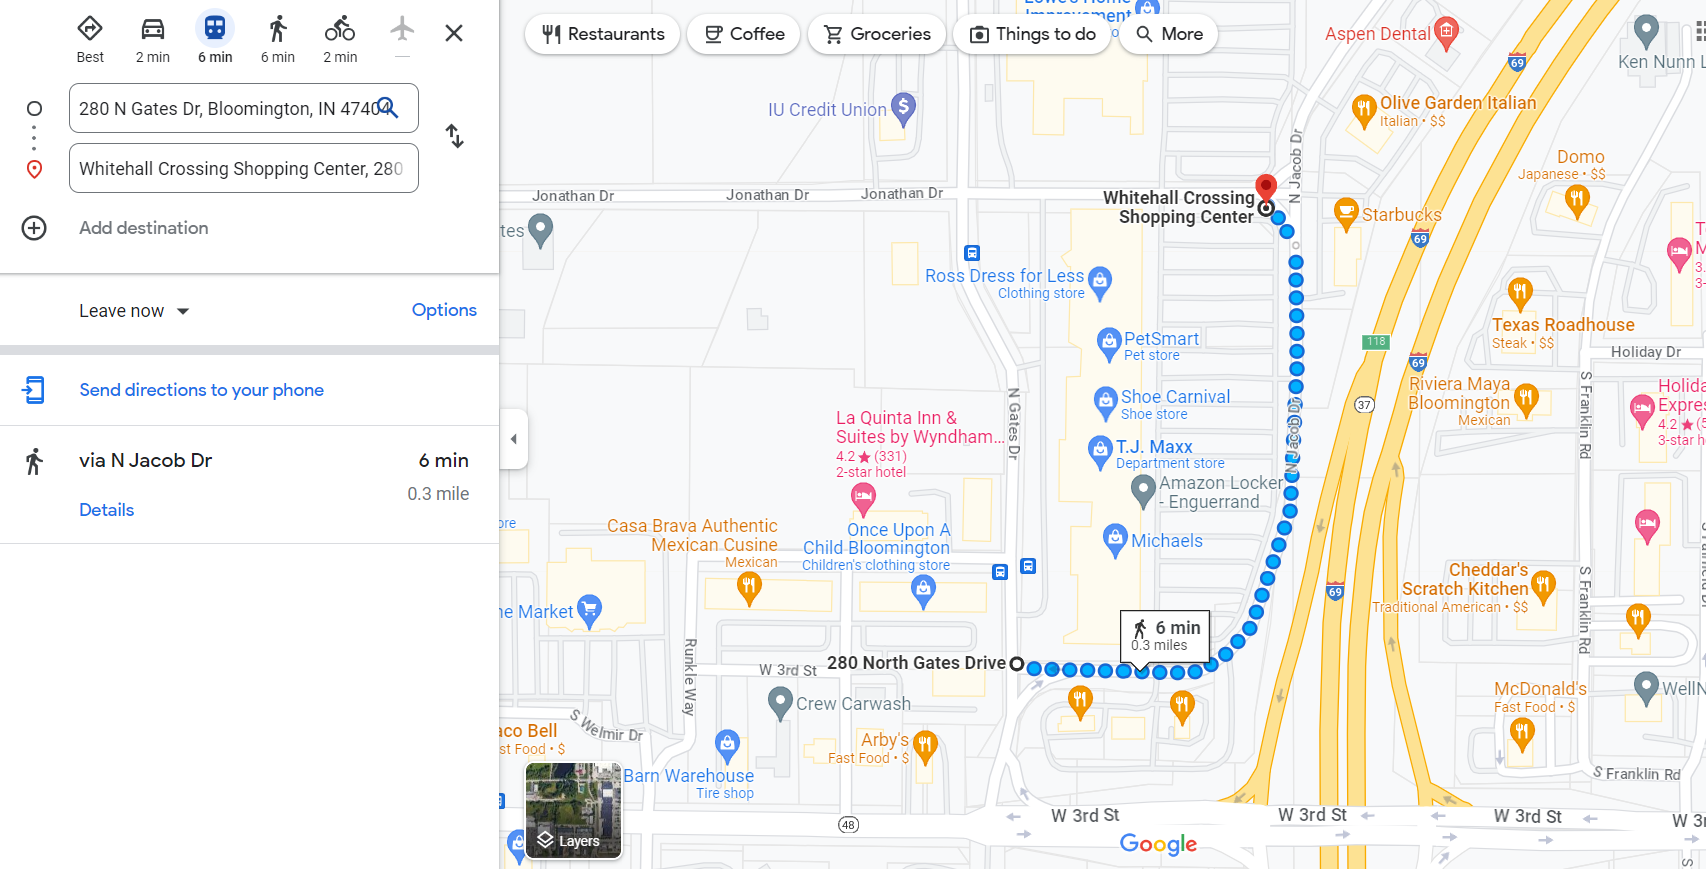

In [131]:
#calculate distance: 
def get_distance(lat1, lon1, lat2, lon2):
    coords1 = (lat1, lon1)
    coords2 = (lat2, lon2)
    return geodesic(coords1, coords2).miles

#making area from distance 3 miles

def assign_area(row):
    radius = 3  # radius of 3 miles
    circle = row.geometry.buffer(radius)
    intersections = gdf[gdf.geometry.intersects(circle)].index
    return min(intersections)

In [132]:
gdf = gpd.GeoDataFrame(data_df, geometry=gpd.points_from_xy(data_df.Longitude, data_df.Latitude))

gdf

,Master Record Number,Date,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude,Location,Number of Bars,Weather Condition,Severity,geometry
0,902582972,2015-12-04,Weekday,22:00:00,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,2ND & HIGH,39.160944,-86.508288,"39.160944,-86.508288",7,Clear,1,POINT (-86.50829 39.16094)
1,902484079,2015-07-06,Weekday,13:00:00,2-Car,Incapacitating,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,S LEONARD SPRINGS,39.142048,-86.582592,"39.142048,-86.582592",1,Clear,2,POINT (-86.58259 39.14205)
2,902399070,2015-02-06,Weekday,16:00:00,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,BARGE & S LEONARD SPRINGS,39.135797,-86.582496,"39.13579732,-86.582496",1,Clear,1,POINT (-86.58250 39.13580)
3,902403874,2015-02-06,Weekday,13:00:00,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,GRAHAM & ROGERS,39.139920,-86.538416,"39.13992,-86.538416",2,Clear,1,POINT (-86.53842 39.13992)
4,902471166,2015-06-06,Weekday,05:00:00,1-Car,No injury/unknown,ANIMAL/OBJECT IN ROADWAY,SR37N & WYLIE,39.198571,-86.529524,"39.19857096,-86.5295245",0,Clear,1,POINT (-86.52952 39.19857)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,902384628,2015-01-07,Weekend,19:00:00,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,EAST RHORER & SOUTH WALNUT STREET,39.121440,-86.526496,"39.12144,-86.526496",0,Overcast,1,POINT (-86.52650 39.12144)
496,902405042,2015-03-01,Weekday,22:00:00,3+ Cars,No injury/unknown,SPEED TOO FAST FOR WEATHER CONDITIONS,1ST & ROGERS,39.159504,-86.538592,"39.159504,-86.538592",41,Patchy moderate snow,1,POINT (-86.53859 39.15950)
497,902438510,2015-05-07,Weekend,15:00:00,2-Car,No injury/unknown,IMPROPER TURNING,STATE ROAD 46,39.207648,-86.573792,"39.207648,-86.573792",0,Clear,1,POINT (-86.57379 39.20765)
498,902427112,2015-04-06,Weekday,17:00:00,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,W THIRD,39.164752,-86.573104,"39.164752,-86.573104",5,Clear,1,POINT (-86.57310 39.16475)


In [133]:
gdf['area_number'] = gdf.apply(assign_area, axis=1)

In [134]:
gdf.to_csv('gdf.csv', index=False)

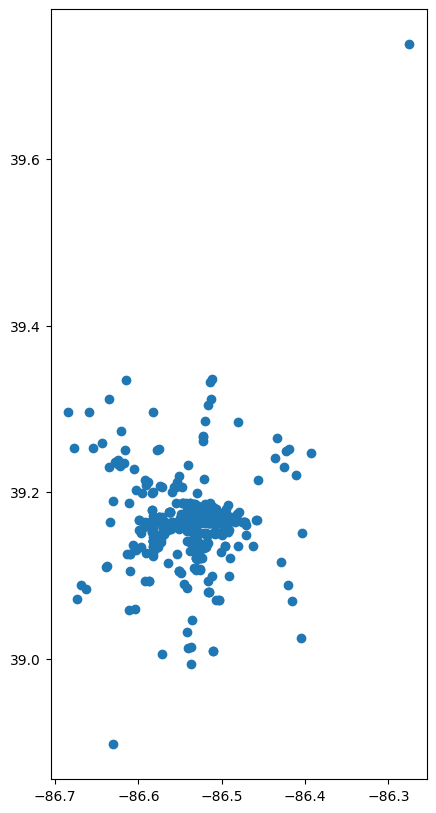

In [135]:
gdf = gpd.GeoDataFrame(data_df, geometry=gpd.points_from_xy(data_df.Longitude, data_df.Latitude))

# Plot the points on a map
gdf.plot(figsize=(10, 10))
plt.show()

In [ ]:
"""
Accident_Analysis.ipynb
# Import the colormap module
import matplotlib.cm
from matplotlib.cm import get_cmap
# Calculate the total number of accidents within 1 mile of a bar
high_density_bars = gdf[gdf['Number of Bars'] >= 11]
total_accidents = high_density_bars['Master Record Number'].count()

# Calculate the percentage of accidents per number of bars within 1 mile
mean_accidents_per_bar = high_density_bars.groupby('Number of Bars')['Master Record Number'].count().reset_index(name='Accident Count')
mean_accidents_per_bar['% Accidents'] = (mean_accidents_per_bar['Accident Count'] / total_accidents) * 100

# Filter the data by the desired ranges
range_11_20 = mean_accidents_per_bar[(mean_accidents_per_bar['Number of Bars'] >= 11) & (mean_accidents_per_bar['Number of Bars'] <= 20)]
range_21_30 = mean_accidents_per_bar[(mean_accidents_per_bar['Number of Bars'] >= 21) & (mean_accidents_per_bar['Number of Bars'] <= 30)]
range_31_40 = mean_accidents_per_bar[(mean_accidents_per_bar['Number of Bars'] >= 31) & (mean_accidents_per_bar['Number of Bars'] <= 45)]

# Plot the data
fig, ax = plt.subplots(figsize=(10,6))
for i, (index, row) in enumerate(range_11_20.iterrows()):
    accidents = high_density_bars[high_density_bars['Number of Bars'] == row['Number of Bars']]
    severity = accidents['Severity'].mean()
    severity_color = 'green' if severity == 1 else 'blue' if severity == 2 else 'red'
    ax.bar(index, row['% Accidents'], color=cmap(i/len(range_11_20)), alpha=0.7, edgecolor=severity_color, linewidth=2)
for i, (index, row) in enumerate(range_21_30.iterrows()):
    accidents = high_density_bars[high_density_bars['Number of Bars'] == row['Number of Bars']]
    severity = accidents['Severity'].mean()
    severity_color = 'green' if severity == 1 else 'blue' if severity == 2 else 'red'
    ax.bar(index+len(range_11_20), row['% Accidents'], color=cmap(i/len(range_21_30)), alpha=0.7, edgecolor=severity_color, linewidth=2)
for i, (index, row) in enumerate(range_31_40.iterrows()):
    accidents = high_density_bars[high_density_bars['Number of Bars'] == row['Number of Bars']]
    severity = accidents['Severity'].mean()
    severity_color = 'green' if severity == 1 else 'blue' if severity == 2 else 'red'
    ax.bar(index+len(range_11_20)+len(range_21_30), row['% Accidents'], color=cmap(i/len(range_31_40)), alpha=0.7,  edgecolor=severity_color, linewidth=2)

# Add legend and axis labels
ax.legend(loc='upper left')
ax.set_xticks([len(range_11_20)/2, len(range_11_20)+len(range_21_30)/2, len(range_11_20)+len(range_21_30)+len(range_31_40)/2])
ax.set_xticklabels(['11-20 bars', '20-33 bars', '35-44'])
ax.set_xlabel('Number of Bars Within 1 Mile')
ax.set_ylabel('% Accidents')
ax.set_title('Percentage of Accidents per Number of Bars Within 1 Mile, by Severity')
plt.show()
""""